<a href="https://colab.research.google.com/github/posi2/BLOCKS/blob/master/Copy_of_cotton_district_wise_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Library Dependency

In [0]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMAResults
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np
from sklearn.metrics import mean_squared_error
import pickle
import sklearn

### Data Preprocessing

#### Reading Datafile

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [81]:
df1 = pd.read_excel("/content/drive/My Drive/convertcsv_dewas.xlsx")
df1.head()

FileNotFoundError: ignored

In [82]:
df2 = pd.read_excel("/content/drive/My Drive/convertcsv_dewas_jowar.xlsx")
df2.head()

FileNotFoundError: ignored

In [0]:
df3 = pd.read_excel("/content/drive/My Drive/convertcsv_dewas_maize.xlsx")
df3.head()

In [83]:
df2.drop(labels = ['Sl no.', 'Commodity', 'Variety', 'Grade', 'Min Price (Rs./Quintal)', 	'Max Price (Rs./Quintal)'], inplace = True, axis = 1)
df2.head()

KeyError: ignored

In [84]:
df3.drop(labels = ['Sl no.', 'Commodity', 'Variety', 'Grade', 'Min Price (Rs./Quintal)', 	'Max Price (Rs./Quintal)'], inplace = True, axis = 1)
df3.head()

KeyError: ignored

In [0]:
df1.drop(labels = ['Sl no.', 'Commodity', 'Variety', 'Grade', 'Min Price (Rs./Quintal)', 	'Max Price (Rs./Quintal)'], inplace = True, axis = 1)
df1.head()

#### Converting dataframe to datetime index and analyze day, week and month wise

In [0]:
def weekend(cell):
    return 1 if( cell.dayofweek == 5 or cell.dayofweek == 6) else 0

In [0]:
def dataframe_preprocess(df_list):
  for df in df_list:
    df['Date'] = pd.to_datetime(df['Price Date'],dayfirst = True)
    df['modal_price'] = df['Modal Price (Rs./Quintal)']
    df['market'] = df['Market Name']
    df.drop(['Modal Price (Rs./Quintal)', 'Price Date'], axis =1 , inplace = True)
    df.sort_values(by = "Date", inplace = True)
    df.dtypes
  return df_list

In [87]:
df_list = [df1, df2, df3]
df_list = dataframe_preprocess(df_list)

KeyError: ignored

In [0]:
df_list[0].head()

In [88]:
for df in df_list:
  df = df.groupby(by='Date',axis = 0).sum() / len(df['market'].unique())
  df['modal_price'] = (df['modal_price']/(df['modal_price'].max()-df['modal_price'].min()))
  print(df.shape)
  print(df.head())

(694, 1)
            modal_price
Date                   
2010-01-01     0.243431
2010-01-02     0.243431
2010-01-03     0.235703
2010-01-04     0.482998
2010-01-05     0.474807
(534, 1)
            modal_price
Date                   
2010-01-01     0.302157
2010-01-02     0.321569
2010-01-04     0.166667
2010-01-05     0.163725
2010-01-06     0.338824
(2299, 1)
            modal_price
Date                   
2010-01-01     0.137298
2010-01-02     0.203899
2010-01-04     0.201775
2010-01-05     0.204051
2010-01-06     0.272624


In [0]:
df_list[0]['modal_price']=df_list[0]['modal_price']/(df_list[0]['modal_price'].max()-df_list[0]['modal_price'].min())
df_list[1]['modal_price']=df_list[1]['modal_price']/(df_list[1]['modal_price'].max()-df_list[1]['modal_price'].min())
df_list[2]['modal_price']=df_list[2]['modal_price']/(df_list[2]['modal_price'].max()-df_list[0]['modal_price'].min())

In [90]:
df_list[0].head()

,District Name,Market Name,Date,modal_price,market
370,Dewas,Khategaon,2010-01-01,0.465357,Khategaon
369,Dewas,Khategaon,2010-01-02,0.465357,Khategaon
871,Dewas,Loharda,2010-01-03,0.450584,Loharda
368,Dewas,Khategaon,2010-01-04,0.457970,Khategaon
870,Dewas,Loharda,2010-01-04,0.465357,Loharda


In [0]:
df_list[0].drop(['District Name',	'Market Name','market'],axis=1,inplace=True)
df_list[1].drop(['District Name',	'Market Name','market'],axis=1,inplace=True)
df_list[2].drop(['District Name',	'Market Name','market'],axis=1,inplace=True)

In [0]:
df_fin=df_list[0].merge(df_list[1],how='outer',on='Date')
df_fin=df_list[2].merge(df_fin,how='outer',on='Date')

In [0]:
df_fin['modal_price_fin']=(df_fin['modal_price']  +	df_fin['modal_price_x'] +	df_fin['modal_price_y'])/3
#df_fin.drop(['modal_price',	'modal_price_x',	'modal_price_y'],axis=1,inplace=True)

In [0]:
df_fin.drop(['modal_price',	'modal_price_x',	'modal_price_y'],axis=1,inplace=True)

In [95]:
df_fin.head()

,Date,modal_price_fin
0,2010-01-01,0.266123
1,2010-01-01,0.275208
2,2010-01-01,0.268320
3,2010-01-01,0.277405
4,2010-01-02,0.274425


In [96]:
df_fin.tail(10)

,Date,modal_price_fin
6222,2011-06-02,NaN
6223,2011-08-23,NaN
6224,2011-10-16,NaN
6225,2011-10-18,NaN
6226,2013-05-04,NaN
6227,2013-05-22,NaN
6228,2013-06-05,NaN
6229,2013-09-15,NaN
6230,2013-10-22,NaN
6231,2014-01-12,NaN


In [0]:
df_fin['modal_price_fin'].replace(np.nan, df_fin['modal_price_fin'].mean(), inplace = True)

In [98]:
df_fin.tail(10)

,Date,modal_price_fin
6222,2011-06-02,0.333433
6223,2011-08-23,0.333433
6224,2011-10-16,0.333433
6225,2011-10-18,0.333433
6226,2013-05-04,0.333433
6227,2013-05-22,0.333433
6228,2013-06-05,0.333433
6229,2013-09-15,0.333433
6230,2013-10-22,0.333433
6231,2014-01-12,0.333433


In [0]:
df_fin_1['modal_price']=df_fin_1['modal_price_x']/a+df_fin_1['modal_price_y']/c

In [0]:
df_fin_1.drop(['Market Name_x',	'modal_price_x',	'market_x',	'District Name_y',	'Market Name_y',	'modal_price_y',	'market_y'],  axis=1,inplace=True)

In [0]:
df_fin_1=df_list[2].merge(df_fin_1,how='inner',on='Date')

In [0]:
df_fin.shape

(6232, 13)

In [0]:
df_fin.head(20)

,District Name,Market Name,Date,modal_price,market,District Name_x,Market Name_x,modal_price_x,market_x,District Name_y,Market Name_y,modal_price_y,market_y
0,Dewas,Sonkatch,2010-01-01,890.0,Sonkatch,Dewas,Khategaon,3150.0,Khategaon,Dewas,Khategaon,701.0,Khategaon
1,Dewas,Sonkatch,2010-01-01,890.0,Sonkatch,Dewas,Khategaon,3150.0,Khategaon,Dewas,Dewas,840.0,Dewas
2,Dewas,Dewas,2010-01-01,920.0,Dewas,Dewas,Khategaon,3150.0,Khategaon,Dewas,Khategaon,701.0,Khategaon
3,Dewas,Dewas,2010-01-01,920.0,Dewas,Dewas,Khategaon,3150.0,Khategaon,Dewas,Dewas,840.0,Dewas
4,Dewas,Dewas,2010-01-02,915.0,Dewas,Dewas,Khategaon,3150.0,Khategaon,Dewas,Sonkatch,800.0,Sonkatch
5,Dewas,Dewas,2010-01-02,915.0,Dewas,Dewas,Khategaon,3150.0,Khategaon,Dewas,Dewas,840.0,Dewas
6,Dewas,Haatpipliya,2010-01-02,883.0,Haatpipliya,Dewas,Khategaon,3150.0,Khategaon,Dewas,Sonkatch,800.0,Sonkatch
7,Dewas,Haatpipliya,2010-01-02,883.0,Haatpipliya,Dewas,Khategaon,3150.0,Khategaon,Dewas,Dewas,840.0,Dewas
8,Dewas,Sonkatch,2010-01-02,890.0,Sonkatch,Dewas,Khategaon,3150.0,Khategaon,Dewas,Sonkatch,800.0,Sonkatch
9,Dewas,Sonkatch,2010-01-02,890.0,Sonkatch,Dewas,Khategaon,3150.0,Khategaon,Dewas,Dewas,840.0,Dewas


In [0]:

df_fin[]

In [0]:
df_list[0].head()

,District Name,Market Name,Date,modal_price,market
370,Dewas,Khategaon,2010-01-01,3150,Khategaon
369,Dewas,Khategaon,2010-01-02,3150,Khategaon
871,Dewas,Loharda,2010-01-03,3050,Loharda
368,Dewas,Khategaon,2010-01-04,3100,Khategaon
870,Dewas,Loharda,2010-01-04,3150,Loharda


##### Collecting data as average of market present in the district

In [0]:
def get_data_district_wise(district_list, df):
  dataframe = []
  for district in district_list:
    dataframe.append(df[df['district'] == district ].groupby(by='Date',axis = 0).sum() / len(df[df['district'] == district]['market'].unique()))
  return dataframe

In [0]:
district_list = ['Vadodara(Baroda)']
dataframe = get_data_district_wise(district_list, df)

In [0]:
dataframe[0].head()

In [0]:
district_modal_price = dataframe[0]['modal_price']

In [0]:
district_modal_price = df.groupby(by='Date',axis = 0).sum() / len(df['market'].unique())
district_modal_price = district_modal_price.modal_price
district_modal_price

### Data Visualization

#### Ploting Data

After ploting data 

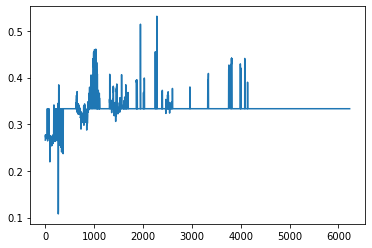

In [99]:
plt.plot(df_fin['modal_price_fin'])

In [0]:
#perform dickey-fuller test
from statsmodels.tsa.stattools import adfuller
def dickey_fuller_test(dataset):
  print('Results of Dickey-Fuller Test')
  dftest = adfuller(dataset, autolag='AIC')

  dfoutput = pd.Series(dftest[0:4], index = ['Test-Statistics','p-value','Flags used','Number of Observations Used'])

  for key,value in dftest[4].items():
      dfoutput['Critical Value (%s)' %key] = value

  if(dftest[1] <= 0.05):
      print('Strong evidance against null hypothesis \n Reject Null hypothesis \n Series id Stationary\n\n')
  else:
      print('Fail to reject the null hyppothesis \n')
      
  print(dfoutput)

In [102]:
dickey_fuller_test(df_fin['modal_price_fin'])

Results of Dickey-Fuller Test
Strong evidance against null hypothesis 
 Reject Null hypothesis 
 Series id Stationary


Test-Statistics                  -5.100861
p-value                           0.000014
Flags used                       31.000000
Number of Observations Used    6200.000000
Critical Value (1%)              -3.431405
Critical Value (5%)              -2.862006
Critical Value (10%)             -2.567018
dtype: float64


### Data Modelling

##### **train test split**

In [109]:
df_fin['modal_price_fin'][1500]

0.3334332167012626

In [154]:
train, test = df_fin['modal_price_fin'][:1400], df_fin['modal_price_fin'][1400:1450]
len(train), len(test)

(1400, 50)

In [155]:
train

0       0.266123
1       0.275208
2       0.268320
3       0.277405
4       0.274425
          ...   
1395    0.379081
1396    0.335918
1397    0.334676
1398    0.338380
1399    0.337138
Name: modal_price_fin, Length: 1400, dtype: float64

In [156]:
test

1400    0.335185
1401    0.333943
1402    0.337647
1403    0.336406
1404    0.334453
1405    0.333211
1406    0.336915
1407    0.335673
1408    0.323562
1409    0.340797
1410    0.320339
1411    0.337574
1412    0.318288
1413    0.335523
1414    0.342352
1415    0.339084
1416    0.335882
1417    0.332503
1418    0.329235
1419    0.326033
1420    0.345721
1421    0.342454
1422    0.339251
1423    0.335873
1424    0.332605
1425    0.329402
1426    0.337428
1427    0.334966
1428    0.346217
1429    0.343755
1430    0.346719
1431    0.343451
1432    0.324559
1433    0.321291
1434    0.345181
1435    0.341913
1436    0.323021
1437    0.319753
1438    0.331631
1439    0.328363
1440    0.309471
1441    0.306203
1442    0.341558
1443    0.329247
1444    0.334892
1445    0.322581
1446    0.327725
1447    0.325263
1448    0.344961
1449    0.320328
Name: modal_price_fin, dtype: float64

 
**ARIMA**
 
ARIMA stands for Auto Regressive Integrated Moving Average. There are seasonal and Non-seasonal ARIMA models that can be used for forecasting.
     
In ARIMA model consists of two models, AR stands for auto-regression and MA stands for moving average.

                 x(t) = alpha *  x(t – 1) + error (t)

This equation is known as AR(1) formulation. The numeral one (1) denotes that the next instance is solely dependent on the previous instance.  The alpha is a coefficient which we seek so as to minimize the error function.

                  x(t) = beta *  error(t-1) + error (t)

This is moving average model equation.In MA model, noise / shock quickly vanishes with time whereas AR model has a much lasting effect of the shock.

Total Correlation Chart (also known as Auto – correlation Function / ACF). ACF is a plot of total correlation between different lag functions.ARIMA model consists of the three parameters 

                   p = autoregressive lags
                   d = order of the differentiation
                   q = moving average 

In [0]:
def fit_modell(dataset, p, i, q):
  from statsmodels.tsa.arima_model import ARIMA
  model = ARIMA(dataset, order = (p,i,q))
  model_fitted = model.fit(disp = -1)
  return model_fitted

In [0]:
def fit_model(dataset, p, i, q):
  from statsmodels.tsa.arima_model import ARIMA
  model = ARIMA(dataset, order = (p,i,q))
  model_fitted = model.fit(disp = -1)
  plt.plot(dataset)
  plt.plot(model_fitted.fittedvalues,color='red')
  print(model_fitted.summary())
  return model_fitted

                              ARMA Model Results                              
Dep. Variable:        modal_price_fin   No. Observations:                 1400
Model:                     ARMA(3, 4)   Log Likelihood                3602.075
Method:                       css-mle   S.D. of innovations              0.018
Date:                Sun, 19 Jan 2020   AIC                          -7186.150
Time:                        04:38:05   BIC                          -7138.952
Sample:                             0   HQIC                         -7168.506
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3219      0.020     16.029      0.000       0.283       0.361
ar.L1.modal_price_fin     1.4131      0.099     14.231      0.000       1.218       1.608
ar.L2.mo

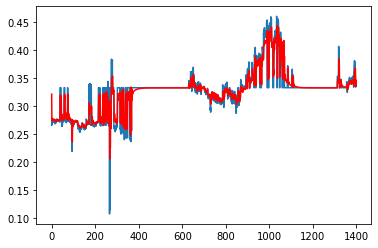

In [159]:
model_fitted = fit_model(train,3, 0, 4)

In [0]:
model_fitted = fit_modell(train,2, 1, 3)

In [0]:
def prediction(model, start_date, end_date, test):
  predicted = model.forecast(steps = 50)
  #plt.plot(train)
  np.reshape(test, test.shape[0])
  #plt.plot(test)
  #plt.plot(predicted[0], color = 'red')
  return predicted

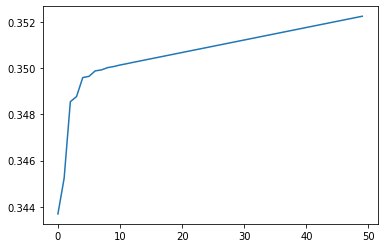

In [190]:
predicted = prediction(model_fitted, 0 , 300 , test)
plt.plot(predicted[0])

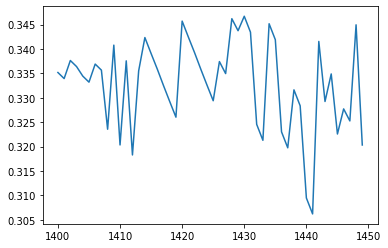

In [191]:
plt.plot(test)

In [0]:
model_fitted.save('cotton_price_prediction_model.pkl')